# Pie Chart

This notebook contains a pie chart of peoples email domains in the csv file located at the url given below.

## Task:

Create a notebook called assignment03-pie.ipynb

The note book should have a nice pie chart of peoples email domains in the csv file at the url

https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download

This csv file has 1000 people. You may download the data or link to it.
Marks will be given for:

1. Just creating the pie chart
2. Making it look nice
and as always a very small amount of marks will be given for just pushing something to your repository this week
As always your code should be well laid out.

If you are having difficulties, know I will be doing more on Pie charts later in this module.

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the dataset. In this case I have loaded the dataset from a google drive link.
url = ('https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download')

df = pd.read_csv(url)

In [3]:
# Display the first 5 rows of the dataset

df.head()

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer


In [4]:
#Count the number of email addresses.
df['Email'].value_counts()

Email
pwarner@example.org           1
jhancock@example.com          1
joel78@example.com            1
koneal@example.net            1
uharrell@example.org          1
                             ..
ohorn@example.com             1
morganwendy@example.net       1
cherylmcmillan@example.org    1
balldrew@example.net          1
deannablack@example.org       1
Name: count, Length: 1000, dtype: int64

So we need to extract the unique domains listed in the email column. To do this we can create a new column called domain which will split the email string at the at symbol. We do this using the str.split() function as below.

In [5]:
# Create a new column called 'domain' that contains the domain name of the email addresses.
df['domain'] = df['Email'].str.split('@').str[1]

In [6]:
# Count the number of occurrences of each domain name.
df['domain'].value_counts()

domain
example.org    341
example.com    339
example.net    320
Name: count, dtype: int64

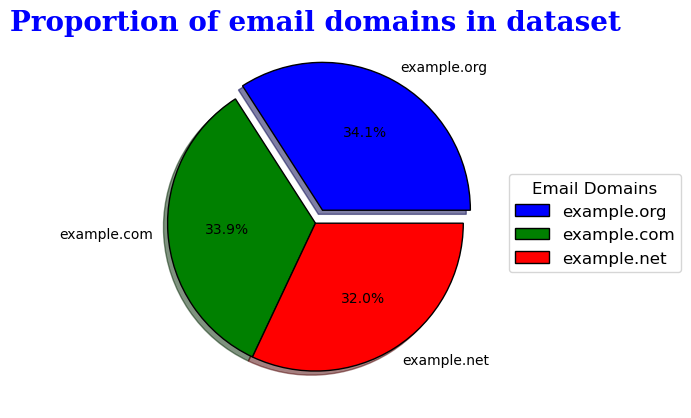

In [ ]:
#Pie chart for categorical data of email domains.

#https://www.geeksforgeeks.org/how-to-create-a-pie-chart-in-seaborn/
#https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

domain_counts = df['domain'].value_counts() #Count the number of email domains in the dataset.
#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title (https://www.w3schools.com/python/matplotlib_labels.asp)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Create a pie chart of the email domains.
fig, ax = plt.subplots()

#Create the pie chart.
ax.pie(domain_counts, labels=domain_counts.index, autopct='%1.1f%%', colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1}, shadow=True, explode = (0.1, 0, 0)) 
#autopct='%1.1f%%' means that the percentages will be shown on the pie chart
#wedgeprops={'edgecolor': 'black', 'linewidth': 1} means that the edges of the pie chart will be black and the width of the edges will be 1.
#explode = (0.1, 0, 0) means that the first slice of the pie chart will be exploded out by 0.1.

ax.set_title('Proportion of email domains in dataset', fontdict = font1, weight = 'bold')

#Set the font and location of the lengend of the pie chart
ax.legend(title='Email Domains', title_fontsize='large', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize='large')

shadow = True


plt.show()


## End